In [7]:
## Homework 3
##
## simple MNIST classifier network
##
## NSC3270/5270 Spring 2019

import numpy as np
import matplotlib.pyplot as plt

# supress unnecessary warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

# load, display, and format mnist images and labels

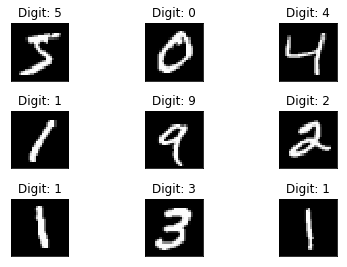

In [10]:
# load mnist
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# display some digits
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(train_images[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(train_labels[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

### reformat training and testing images

In [11]:
# check out dimensions and types of mnist data
print('Training images shape: ', train_images.shape)
print('Training images type:  ', type(train_images[0][0][0]))
print('Testing images shape:  ', test_images.shape)
print('Testing images type:   ', type(test_images[0][0][0]))

Training images shape:  (60000, 28, 28)
Training images type:   <class 'numpy.uint8'>
Testing images shape:   (10000, 28, 28)
Testing images type:    <class 'numpy.uint8'>


In [12]:
# image shape
sz = train_images.shape[1]

# need to reshape and preprocess the training/testing images
train_images_vec = train_images.reshape((train_images.shape[0], train_images.shape[1] * train_images.shape[2]))
train_images_vec = train_images_vec.astype('float32') / 255
test_images_vec = test_images.reshape((test_images.shape[0], test_images.shape[1] * test_images.shape[2]))
test_images_vec = test_images_vec.astype('float32') / 255

# display new input dimensions/type
print('Training images shape: ', train_images_vec.shape)
print('Training images type:  ', type(train_images_vec[0][0]))
print('Testing images shape:  ', test_images_vec.shape)
print('Testing images type:   ', type(test_images_vec[0][0]))

Training images shape:  (60000, 784)
Training images type:   <class 'numpy.float32'>
Testing images shape:   (10000, 784)
Testing images type:    <class 'numpy.float32'>


### reformat training and testing labels

In [13]:
# check out dimensions and types of mnist data
print('Training labels shape: ', train_labels.shape)
print('Training labels type:  ', type(train_labels[0]))

Training labels shape:  (60000,)
Training labels type:   <class 'numpy.uint8'>


In [14]:
# also need to categorically encode the labels
print("First 5 training labels as labels:\n", train_labels[:5])
from keras.utils import to_categorical
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)
print("First 5 training labels as one-hot encoded vectors:\n", train_labels_onehot[:5])

First 5 training labels as labels:
 [5 0 4 1 9]
First 5 training labels as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [15]:
# display new output dimensions/type
print('Training labels shape (one hot): ', train_labels_onehot.shape)
print('Training labels type (one hot):  ', type(train_labels_onehot[0][0]))

Training labels shape (one hot):  (60000, 10)
Training labels type (one hot):   <class 'numpy.float32'>


# define and train neural network

In [17]:
# import tools for basic keras networks 
from keras import models
from keras import layers

nout = 10
# create architecture of simple neural network model
# input layer  : 28*28 = 784 input nodes
# output layer : 10 (nout) output nodes
network = models.Sequential()
network.add(layers.Dense(nout, activation='sigmoid', input_shape=(sz * sz,)))

# print a model summary
print(network.summary())
print()
for layer in network.layers:
    print('layer name : {} | input shape : {} | output shape : {}'.format(layer.name, layer.input.shape, layer.output.shape))
print()
for layer in network.layers:
    print(layer.get_config())
print()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None

layer name : dense_1 | input shape : (?, 784) | output shape : (?, 10)

{'name': 'dense_1', 'trainable': True, 'batch_input_shape': (None, 784), 'dtype': 'float32', 'units': 10, 'activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}



In [18]:
# compile network
network.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

# now train the network
history = network.fit(train_images_vec, train_labels_onehot, verbose=False, validation_split=.1, epochs=20, batch_size=128)
print('Done training!')

# test network
test_loss, test_acc = network.evaluate(test_images_vec, test_labels_onehot, verbose=False)
print('test_acc:', test_acc)


Done training!
test_acc: 0.7839


# some pieces needed to complete Homework 3

In [20]:
# get learned network weights and biases
W = network.layers[0].get_weights()[0]     # weights input to hidden
B = network.layers[0].get_weights()[1]     # bias to hidden
print('W {} | B {}'.format(W.shape, B.shape))

W (784, 10) | B (10,)


In [21]:
# model predictions (all 10000 test images)
out = network.predict(test_images_vec)

# model predictions (a single test image)
example = test_images_vec[123]
print(example.shape)
# vector passed to network.predict must be (?, 784)
example = example.reshape((1,example.shape[0]))
print(example.shape)

(784,)
(1, 784)
